# The<span style="color:orange"> FoodStyles </span>Technical Challenge

Yunus Emre Emik yunus_emre3497@hotmail.com

https://github.com/yunusemreemik/foodstyle_challenge

### The challenge
You are given a dataset (assets/dataset.zip) containing information about restaurants all over Europe. The goal of the challenge is to make sense of the dataset and understand it in such a way that informed, data-based business decisions can be made. To make things easier, the challenge is split into three conceptually independent parts, with action points at each part. 


#### Data cleaning
1.	Identify the columns with mixed data types.
2.	For each column, count the number of rows per data type.
3.	Would removing missing values solve the mixed data type problem?


## <span style="color:orange">Data cleaning</span>

## 1.	Identify the columns with mixed data types.

Starting with reading big data options. The "assets\dataset.csv" including over a million data. The code is reading a CSV file called "dataset.csv" in chunks of 10000 rows using the pandas library. It then iterates through the chunks and prints the shape of each chunk. The iteration stops after reading the first 5 chunks.

In [1]:
import pandas as pd

# Read the file in chunks of 1000 rows
chunks = pd.read_csv("assets\dataset.csv", chunksize=10000)

In [2]:
for i, chunk in enumerate(chunks):
    # Do something with the chunk
    #print(chunk.head())
    print(chunk.shape)
    # stop after reading 5 chunks
    if i == 4:
        break


(10000, 42)
(10000, 42)
(10000, 42)
(10000, 42)
(10000, 42)


In [3]:
#Use nrows count only
#df = pd.read_csv("assets\dataset.csv", nrows=100000)
#Use all of data once.
full_data = pd.read_csv("assets\dataset.csv")

C:\Users\YUNUS\AppData\Local\Temp\ipykernel_22308\1651362596.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("assets\dataset.csv")


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

The first 7 features appear to be solid and reliable for identifying a unique restaurant row. However, the data seems to be mixed and needs to be controlled for each row. 

## 2.	For each column, count the number of rows per data type.

In [8]:
# Apply type method for each row and get count.
for col in full_data.columns:    
    data_types = full_data[col].apply(type).value_counts()
    print(data_types)
    

<class 'str'>    1083397
Name: restaurant_link, dtype: int64
<class 'str'>    1083397
Name: restaurant_name, dtype: int64
<class 'str'>    1083397
Name: original_location, dtype: int64
<class 'str'>    1083397
Name: country, dtype: int64
<class 'str'>      1033074
<class 'float'>      50323
Name: region, dtype: int64
<class 'str'>      742765
<class 'float'>    340632
Name: province, dtype: int64
<class 'str'>      682712
<class 'float'>    400685
Name: city, dtype: int64
<class 'str'>    1083397
Name: address, dtype: int64
<class 'float'>    1083397
Name: latitude, dtype: int64
<class 'float'>    1083397
Name: longitude, dtype: int64
<class 'str'>      1081555
<class 'float'>       1842
Name: claimed, dtype: int64
<class 'float'>    820264
<class 'str'>      263133
Name: awards, dtype: int64
<class 'str'>      988409
<class 'float'>     94988
Name: popularity_detailed, dtype: int64
<class 'str'>      985605
<class 'float'>     97792
Name: popularity_generic, dtype: int64
<class 'str'>

In [ ]:
full_data["city"].head(100).unique().tolist()

['Saint-Jouvent',
 'Rivarennes',
 'Lacelle',
 'Saint-Laurent-de-Levezou',
 'Le Crozet',
 'Saint-Denis',
 'Orgibet',
 'They-sous-Montfort',
 'Journans',
 'Rocbaron',
 'Le Bec-Hellouin',
 'Lanslebourg Mont Cenis',
 'Valhuon',
 'Saint-Bonnet en Champsaur',
 'Saint-Martin-du-Bois',
 'St Suliac',
 'Espaly-Saint-Marcel',
 'Meaulte',
 'Conflans Sainte Honorine']

In [ ]:

full_data[full_data["restaurant_name"].str.contains("Bento Nguyen")]

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
213530,g187309-d21233601,Bento Nguyen,"[""Europe"", ""Germany"", ""Bavaria"", ""Upper Bavari...",Germany,Bavaria,Upper Bavaria,Munich,"Schleissheimer Str. 221, 80809 Munich, Bavaria...",48.173590,11.565110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213739,g187309-d2368220,Bento Nguyen,"[""Europe"", ""Germany"", ""Bavaria"", ""Upper Bavari...",Germany,Bavaria,Upper Bavaria,Munich,"Paul-Heyse-Str. 2, 80336 Munich, Bavaria Germany",48.138897,11.556104,...,11.0,16.0,4.0,0.0,2.0,4.0,4.5,4.5,NaN,NaN


## 3.	Would removing missing values solve the mixed data type problem?

In [9]:
#mixed columns
df["service"].unique()

array([4.5, nan, 3.5, 4. , 5. , 3. , 2.5, 2. , 1.5, 1. ])

This is a Python function that takes in a DataFrame as an input (df) and modifies it to fix mixed data types and missing values. The function first loops through all the columns in the DataFrame and checks if each column has mixed data types. If it does, the function converts the column to a specific data type. If the missing value ratio is greater than or equal to 0.5, it converts the column to string type, otherwise it converts the column to the data type that has the most observations.

After fixing mixed data types, the function then uses IterativeImputer from the sklearn library to fix missing values in the numeric columns (float64 and int64). IterativeImputer is a method that can estimate missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.


In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.linear_model import BayesianRidge

def fix_mixed_data(data):
    # Fix mixed data types
    for col in data.columns:
        try:
            # Check if the column has mixed data types
            if len(data[col].apply(type).value_counts()) > 1:
                # Convert the column to a specific data type
                if data[col].isna().mean() >= 0.5:
                    data[col] = data[col].astype('str')
                else:
                    data[col] = data[col].astype(data[col].apply(type).value_counts().axes[0][0])
        except Exception as e:
            pass
    
    return data

def fix_nulls(data):
    # Fix missing values
    imputer = IterativeImputer(BayesianRidge(), max_iter=10, random_state=0)
    most_f_imputer = SimpleImputer(strategy='most_frequent')
    for col in data.columns:
        if data[col].dtypes in ['float64', 'int64']:
            data[[col]] = imputer.fit_transform(data[[col]])
        else: 
            data[[col]] = most_f_imputer.fit_transform(data[[col]])
    
    return data

Finally, the function returns the modified DataFrame.

In [11]:
fixed_df = fix_mixed_data(df)

In [12]:
clean_df =  fix_nulls(fixed_df)

In [13]:
#mixed columns
clean_df["service"].unique()

array([4.5       , 4.06724537, 3.5       , 4.        , 5.        ,
       3.        , 2.5       , 2.        , 1.5       , 1.        ])

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1083397 non-null  object 
 5   province                           1083397 non-null  object 
 6   city                               1083397 non-null  object 
 7   address                            1083397 non-null  object 
 8   latitude                           1083397 non-null  float64
 9   longitude                          1083397 non-null  float64
 10  claimed                            1083397 non-null  object 
 11  awards                  

In [15]:
# Apply type method for each row and get count.
for col in clean_df.columns:    
    data_types = clean_df[col].apply(type).value_counts()
    print(data_types)

<class 'str'>    1083397
Name: restaurant_link, dtype: int64
<class 'str'>    1083397
Name: restaurant_name, dtype: int64
<class 'str'>    1083397
Name: original_location, dtype: int64
<class 'str'>    1083397
Name: country, dtype: int64
<class 'str'>    1083397
Name: region, dtype: int64
<class 'str'>    1083397
Name: province, dtype: int64
<class 'str'>    1083397
Name: city, dtype: int64
<class 'str'>    1083397
Name: address, dtype: int64
<class 'float'>    1083397
Name: latitude, dtype: int64
<class 'float'>    1083397
Name: longitude, dtype: int64
<class 'str'>    1083397
Name: claimed, dtype: int64
<class 'str'>    1083397
Name: awards, dtype: int64
<class 'str'>    1083397
Name: popularity_detailed, dtype: int64
<class 'str'>    1083397
Name: popularity_generic, dtype: int64
<class 'str'>    1083397
Name: top_tags, dtype: int64
<class 'str'>    1083397
Name: price_level, dtype: int64
<class 'str'>    1083397
Name: price_range, dtype: int64
<class 'str'>    1083397
Name: meals, 

it is applying the 'type' method to each row of that column and getting the count of each type using the 'value_counts' method. It then prints the count of each data type for that column. This can be useful for understanding the data types of each column and identifying any data type inconsistencies.

### Data understanding
1.	Are the review columns correlated with the rating columns? 

●	Review columns: ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]

●	Rating columns: ["food", "service", "value", "atmosphere", "avg_rating"]

2.	Are vegetarian-friendly restaurants better than non-vegetarian ones?
3.	Are there any significantly more expensive cuisines?


## <span style="color:orange"> Data understanding </span>

## 1.	Are the review columns correlated with the rating columns? 

In [16]:
review_columns = ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
rating_columns = ["food", "service", "value", "atmosphere", "avg_rating"]

correlation_matrix = clean_df[review_columns+rating_columns].corr()

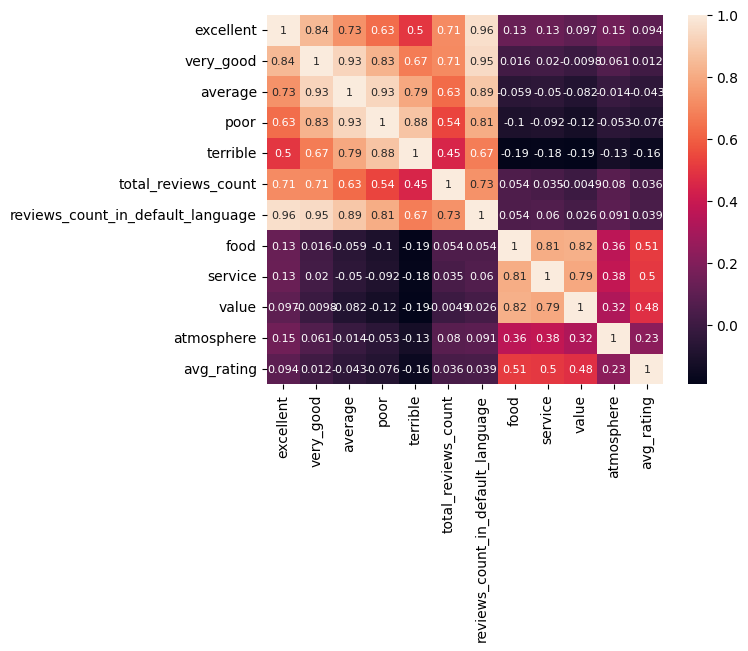

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8})
plt.show()

In [18]:
correlation_matrix

,excellent,very_good,average,poor,terrible,total_reviews_count,reviews_count_in_default_language,food,service,value,atmosphere,avg_rating
excellent,1.000000,0.842964,0.733120,0.632904,0.497784,0.713753,0.959361,0.126146,0.132082,0.097468,0.149090,0.093821
very_good,0.842964,1.000000,0.928148,0.825488,0.672637,0.708297,0.947613,0.015959,0.020349,-0.009830,0.061328,0.011775
average,0.733120,0.928148,1.000000,0.934195,0.791354,0.631771,0.887308,-0.058957,-0.050322,-0.081869,-0.013675,-0.043477
poor,0.632904,0.825488,0.934195,1.000000,0.878500,0.537628,0.805920,-0.101894,-0.091623,-0.123531,-0.053084,-0.075998
terrible,0.497784,0.672637,0.791354,0.878500,1.000000,0.447282,0.674115,-0.186726,-0.178214,-0.191920,-0.125171,-0.155136
total_reviews_count,0.713753,0.708297,0.631771,0.537628,0.447282,1.000000,0.733862,0.053769,0.035312,-0.004933,0.079564,0.036215
reviews_count_in_default_language,0.959361,0.947613,0.887308,0.805920,0.674115,0.733862,1.000000,0.053552,0.060373,0.025909,0.090651,0.038627
food,0.126146,0.015959,-0.058957,-0.101894,-0.186726,0.053769,0.053552,1.000000,0.805844,0.816651,0.360032,0.511816
service,0.132082,0.020349,-0.050322,-0.091623,-0.178214,0.035312,0.060373,0.805844,1.000000,0.791781,0.377171,0.504255
value,0.097468,-0.009830,-0.081869,-0.123531,-0.191920,-0.004933,0.025909,0.816651,0.791781,1.000000,0.324313,0.483029


### Summary Of Corelation Table

This correlation table shows the correlation between the given variables. Each row and column represents a variable and each cell represents the correlation between two variables.

For example, the correlation between the "excellent" variable and the "very_good" variable is 0.842964. This value indicates a positive relationship between the two variables. A high correlation value (around 1) indicates a strong relationship between the two variables, while a low correlation value (around 0) indicates a weak relationship.

Similarly, the correlation between the "excellent" variable and the "food" variable is 0.126146, which indicates a weak relationship between the two variables.

Also, the correlation between "reviews_count_in_default_language" variable and "food" variable is 0.053552 which means there is almost no relationship between these two variables.

"avg_rating" variable has positive correlation with all other variables. for example, the correlation between "avg_rating" and "excellent" is 0.093821.

So, the table shows that there are correlations between the group variables of "excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language" and the group variables of "food", "service", "value", "atmosphere", "avg_rating", but these are not high values, thus the relationships are weak.<b> This is because review_columns features are not in a range and are displayed with aggregate values.</b> 

### <span style="color:orange"> Alternative Way </span>

In [19]:
related_review_columns = ["excellent", "very_good", "average", "poor", "terrible"]

In [20]:
dictionary = {"excellent": 5.0,
        "very_good": 4.0,
        "average": 3.0,
        "poor": 2.0,
        "terrible": 1.0,}

In [21]:
clean_df[related_review_columns].idxmax(axis=1).unique()

array(['excellent', 'very_good', 'poor', 'terrible', 'average'],
      dtype=object)

In [22]:
test = clean_df[related_review_columns].idxmax(axis=1)
clean_df["most_ratings"] = test.map(dictionary)

Optional : Average rating value also could use.

In [23]:
review_columns = ["most_ratings"]
rating_columns = ["food", "service", "value", "atmosphere", "avg_rating"]

correlation_matrix = clean_df[review_columns+rating_columns].corr()

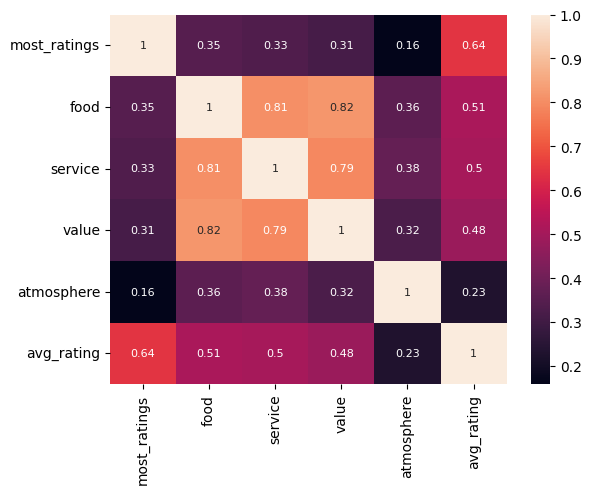

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8})
plt.show()

In [25]:
correlation_matrix

,most_ratings,food,service,value,atmosphere,avg_rating
most_ratings,1.000000,0.345910,0.334443,0.313444,0.158510,0.643037
food,0.345910,1.000000,0.805844,0.816651,0.360032,0.511816
service,0.334443,0.805844,1.000000,0.791781,0.377171,0.504255
value,0.313444,0.816651,0.791781,1.000000,0.324313,0.483029
atmosphere,0.158510,0.360032,0.377171,0.324313,1.000000,0.228369
avg_rating,0.643037,0.511816,0.504255,0.483029,0.228369,1.000000


In this table, the variable "most_ratings" has a strong positive correlation with "avg_rating" (0.643037). This suggests that when the number of reviews is high, the rating of the place is also high, indicating a positive relationship between the two variables.

The variable "food" has a moderate positive correlation with "avg_rating" (0.511816) and a strong positive correlation with "service" (0.805844) and "value" (0.816651) which means that the quality of food is positively related with the overall rating and the service and value aspects of the place.

## 2.	Are vegetarian-friendly restaurants better than non-vegetarian ones?

In [26]:
clean_df[clean_df["vegan_options"] == "Y"].avg_rating.mean()

4.295057187387689

In [27]:
clean_df[clean_df["vegan_options"] == "N"].avg_rating.mean()

3.9985598292897273

In [28]:
clean_df[clean_df["vegan_options"] == "Y"].most_ratings.mean()

4.878035388771349

In [29]:
clean_df[clean_df["vegan_options"] == "N"].most_ratings.mean()

4.503179129700042

It is important to note that this is just an average and may not fully represent the distribution of ratings for items with vegan options. Additionally, the sample size of the subset used to calculate this average may also be small and may not be representative of the entire population.

My opinion is the "Yes". Vegetarian-friendly restaurants better than non-vegetarian ones.

## 3.	Are there any significantly more expensive cuisines?

In [30]:
clean_df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,very_good,average,poor,terrible,food,service,value,atmosphere,keywords,most_ratings
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,0.0,0.0,0.0,0.0,4.000000,4.500000,4.000000,3.933682,nan,5.0
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,1.0,0.0,0.0,4.104179,4.067245,3.982897,3.933682,nan,5.0
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,1.0,0.0,0.0,0.0,4.104179,4.067245,3.982897,3.933682,nan,5.0
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,0.0,0.0,0.0,0.0,4.500000,4.500000,4.500000,3.933682,nan,5.0
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,7.0,0.0,0.0,0.0,4.500000,4.500000,4.500000,3.933682,nan,4.0


In [31]:
clean_df["price_level"].value_counts()

€€-€€€    537918
nan       277205
€         240205
€€€€       28069
Name: price_level, dtype: int64

In [32]:
clean_df["price_range"].value_counts().sort_values()

€35-€180          1
€57-€174          1
€79-€250          1
€133-€199         1
€38-€84           1
              ...  
€5-€20         4793
€10-€20        5148
€5-€15         5810
€10-€30        5937
nan          779070
Name: price_range, Length: 7299, dtype: int64

In [33]:
clean_df["price_range"].str.replace("€","").str.split("-")


0           [nan]
1           [nan]
2           [nan]
3           [nan]
4           [nan]
            ...  
1083392     [nan]
1083393     [nan]
1083394     [nan]
1083395    [2, 8]
1083396     [nan]
Name: price_range, Length: 1083397, dtype: object

In [34]:
price_range = pd.DataFrame()

In [35]:
price_range[["col1","col2"]] = clean_df["price_range"].str.replace("€","").str.split("-").apply(pd.Series)

In [36]:
price_range["restaurant_name"] = clean_df["restaurant_name"]
price_range["cuisines"] = clean_df["cuisines"]

In [37]:
price_range = price_range.reset_index(drop=True).dropna()

In [38]:
price_range = price_range[~(price_range["col1"].str.contains("CHF"))]
price_range = price_range[pd.to_numeric(price_range['col1'], errors='coerce').notnull()]
price_range = price_range[pd.to_numeric(price_range['col2'], errors='coerce').notnull()]
price_range["col1"] = price_range["col1"].astype(int)
price_range["col2"] = price_range["col2"].astype(int)

In [39]:
price_range.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299568 entries, 5 to 1083395
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   col1             299568 non-null  int32 
 1   col2             299568 non-null  int32 
 2   restaurant_name  299568 non-null  object
 3   cuisines         299568 non-null  object
dtypes: int32(2), object(2)
memory usage: 9.1+ MB


In [40]:
price_range.sort_values(by=["col1","col2"], ascending=False)

,col1,col2,restaurant_name,cuisines
850545,750,850,Totalerg Stazione Di Servizio,Italian
605565,687,687,The Royal George,"Bar, British, Pub"
16900,662,827,Le buron de la Croix Saint Robert,"Salvadoran, Azerbaijani, French, South America..."
511873,661,862,Listo Burrito,"Mexican, Fast food, Healthy, Street Food"
927388,660,827,Villa Strandvägen,"European, Swedish, Scandinavian"
...,...,...,...,...
1080547,0,2,Sky Restaurant,International
1081058,0,2,Maison du Cafe,"Italian, Cafe, International, Arabic"
1081291,0,2,Cafeneaua Noastra,"European, Brew Pub, Cafe, Pub"
1081890,0,2,The Bean Specialty Coffee Sighisoara,Cafe


In [41]:
price_range.groupby("cuisines").mean()[['col1','col2']].reset_index().sort_values(by=["col1","col2"], ascending=False).head(10)

C:\Users\YUNUS\AppData\Local\Temp\ipykernel_22308\3673609339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_range.groupby("cuisines").mean()[['col1','col2']].reset_index().sort_values(by=["col1","col2"], ascending=False).head(10)


,cuisines,col1,col2
55158,"Salvadoran, Azerbaijani, French, South America...",662.0,827.0
7622,"Bar, Pub, Italian, Cafe, Fast food",578.0,826.0
52483,"Pizza, Fast food, Turkish, Grill, Street Food",457.0,832.0
13473,"Cafe, Middle Eastern, Egyptian, Mediterranean,...",405.0,869.0
32099,"Irish, Cafe, European, Deli, Healthy",400.0,850.0
34062,"Italian, Bar, Pizza, Pub, Middle Eastern, Afghani",350.0,800.0
50508,"Mexican, Fast food, Healthy, Street Food",333.5,435.5
25307,"French, Swedish",328.0,378.0
6489,"Bar, International, European, Dining bars",240.0,364.0
30488,"International, European, Contemporary, Mediter...",240.0,240.0


## 		<span style="color:orange">Salvadoran, Azerbaijani, French, South America...</span> 				

These data suggest that multi-cuisine cookers are more expensive.

![Auberge du Bois Prin](https://upload.wikimedia.org/wikipedia/commons/e/eb/Gastronomia_salvadore%C3%B1a.png)

## Business-specific
1.	In the assets directory, you will see a very small dataset called europe_capitals_population_and_area.csv. A gluten-free restaurant wants to open a new restaurant in a European capital where gluten-free restaurants are underrepresented. Assuming there are no other factors, except population and gluten-free restaurant density, what would be the top 5 capitals to open that restaurant?
2.	Think and propose a couple of other ways this dataset could be used to help businesses.


### 1.	In the assets directory, you will see a very small dataset called europe_capitals_population_and_area.csv. A gluten-free restaurant wants to open a new restaurant in a European capital where gluten-free restaurants are underrepresented. Assuming there are no other factors, except population and gluten-free restaurant density, what would be the top 5 capitals to open that restaurant?

In [42]:
#Use all of data once.
europe_data = pd.read_csv("assets\europe_capitals_population_and_area.csv",sep =";")

In [43]:
europe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CityNo        31 non-null     int64 
 1   City          31 non-null     object
 2   Country       31 non-null     object
 3   Population    31 non-null     int64 
 4   Area in km2   31 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.3+ KB


In [44]:
europe_data.sort_values(ascending = False,by="Population").head(10)

,CityNo,City,Country,Population,Area in km2
16,17,London,England,8825000,607
3,4,Berlin,Germany,3711930,"891,7"
19,20,Madrid,Spain,3141991,"604,3"
26,27,Rome,Italy,2868782,1285
24,25,Paris,France,2206488,"105,4"
28,29,Vienna,Austria,1889083,"414,6"
11,12,Hamburg,Germany,1822445,755
6,7,Budapest,Hungary,1779361,"525,2"
29,30,Warsaw,Poland,1764615,517
2,4,Barcelona,Spain,1620809,"101,4"


In [45]:
elected_data = full_data[full_data["city"].isin(europe_data["City"].tolist())].reset_index(drop=True)

In [46]:
elected_data["city"].unique()

array(['Paris', 'Lyon', 'Amsterdam', 'Zurich', 'Munich', 'Vienna',
       'Madrid', 'Rome', 'Milan', 'Dublin', 'Stockholm', 'Athens',
       'Lisbon', 'Bratislava', 'Prague', 'Budapest', 'Helsinki',
       'Copenhagen'], dtype=object)

In [47]:
merged_df = pd.merge(elected_data, europe_data, left_on="city",right_on='City', how='inner')

In [48]:
df_ver2 = merged_df[["City","Population","gluten_free"]]

In [49]:
grouped = df_ver2.groupby('City')
grouped.size()

City
Amsterdam      4352
Athens         2915
Bratislava     1400
Budapest       3557
Copenhagen     2445
Dublin         2749
Helsinki       1708
Lisbon         5261
Lyon           2930
Madrid        12134
Milan          8382
Munich         3508
Paris         18129
Prague         6035
Rome          12603
Stockholm      3292
Vienna         4571
Zurich            1
dtype: int64

In [50]:
# Get the count of rows in each group
group_count = grouped.size()

In [51]:
# Create a new DataFrame with the city and count of restaurants
city_count = group_count.to_frame().rename(columns={0:"all_rest"}).reset_index()

In [52]:
# Get the restourants size witg "gluten_free" is "Y"
df_ver2[df_ver2['gluten_free'] == 'Y'].groupby('City').size()

City
Amsterdam      622
Athens         271
Bratislava      67
Budapest       433
Copenhagen     251
Dublin         596
Helsinki       199
Lisbon         537
Lyon            54
Madrid        1368
Milan         1154
Munich         256
Paris          582
Prague         389
Rome          1654
Stockholm      366
Vienna         413
dtype: int64

In [53]:
#Set index as City
city_count = city_count.set_index("City")

In [54]:
# Add a column for gluten-free restaurants
city_count['gluten_free_count'] = df_ver2[df_ver2['gluten_free'] == 'Y'].groupby('City').size()

In [55]:
city_count = pd.merge(city_count,europe_data[["City","Population"]],left_on="City",right_on="City")

In [56]:
# Add a column for percentage of gluten-free restaurants
city_count['gluten_free_percentage'] = (city_count['gluten_free_count']/city_count["all_rest"])*100

In [57]:
city_count['restaurant_per_person'] = (city_count["all_rest"]/city_count['Population'])

In [58]:
# Sort and fix data
city_count = city_count.sort_values(by=['gluten_free_percentage','restaurant_per_person'],ascending=False).reset_index()

In [59]:
city_count.dropna().tail(5)

,index,City,all_rest,gluten_free_count,Population,gluten_free_percentage,restaurant_per_person
12,11,Munich,3508,256.0,1456039,7.297605,0.002409
13,13,Prague,6035,389.0,1301132,6.445733,0.004638
14,2,Bratislava,1400,67.0,424428,4.785714,0.003299
15,12,Paris,18129,582.0,2206488,3.210326,0.008216
16,8,Lyon,2930,54.0,506615,1.843003,0.005783


## 		<span style="color:orange">Conclusion</span> 

 The table has 4 columns: City, all_rest, gluten_free_count, and gluten_free_percentage.

The City column lists the different cities.
The all_rest column lists the total number of restaurants in each city.
The gluten_free_count column lists the number of gluten-free restaurants in each city.
The gluten_free_percentage column lists the percentage of gluten-free restaurants in each city, calculated by dividing the gluten_free_count by all_rest.

According to the data, Munich, Prague, Bratislava, Paris and Lyon are the cities that are listed in the dataframe. Assuming there are no other factors, except population and gluten-free restaurant density yhe best capital for the open restourant is Lyon.

## 2.	Think and propose a couple of other ways this dataset could be used to help businesses.

### 2.1 Most Frequent Cuisines All Around The Europe.

This script loads the dataset into a pandas DataFrame, groups the data by city and cuisines, counts the number of restaurants in each city and cuisines, sorts the data in descending order, and prints the top 10 cusines by city.

In [60]:
merged_df['cuisines'] = merged_df['cuisines'].astype("str")
df_cuisines = merged_df['cuisines'].apply(lambda x: pd.Series(x.split(','))).stack().reset_index(level=1, drop=True).to_frame('cuisines')

In [61]:
# Create a new dataframe with one row per cuisine
df_cuisines = merged_df['cuisines'].str.split(',').apply(pd.Series, 1).stack()
df_cuisines.index = df_cuisines.index.droplevel(-1)
df_cuisines.name = 'cuisines'
df_cuisines = df_cuisines.reset_index()

In [62]:
df_cuisines = pd.merge(df_cuisines, merged_df[['city']].reset_index(),left_on="index",right_on="index")

In [63]:
df_cuisines

,index,cuisines,city
0,0,Italian,Paris
1,1,French,Paris
2,1,European,Paris
3,1,Contemporary,Paris
4,2,Japanese,Paris
...,...,...,...
222935,95969,Street Food,Copenhagen
222936,95969,Danish,Copenhagen
222937,95970,Asian,Copenhagen
222938,95970,Thai,Copenhagen


In [64]:
# Group the data by city and cuisines
grouped_data = df_cuisines.groupby(['cuisines','city']).size().reset_index(name='count')

# Sort the data by the number of restaurants, in descending order
grouped_data.sort_values(by='count', ascending=False, inplace=True)

In [65]:
grouped_data[grouped_data["cuisines"] != "nan"].head(10)

,cuisines,city,count
2505,Italian,Rome,7639
2292,French,Paris,6498
2501,Italian,Milan,4426
683,European,Paris,3732
1144,Mediterranean,Rome,3425
1593,Spanish,Madrid,2891
2852,Spanish,Madrid,2848
1340,Pizza,Rome,2380
1360,Portuguese,Lisbon,2164
455,Central-Italian,Rome,2030


## 2.2 Location analysis:
	The latitude and longitude information in the dataset could be used to identify high-traffic areas or areas with a high concentration of restaurants. This information could be used to help businesses choose a location for a new restaurant or identify areas where there may be opportunities for expansion.

In [66]:
loc_data = merged_df[["restaurant_name","latitude","longitude"]].dropna(subset=['latitude', 'latitude']).reset_index(drop=True).head(100)

In [67]:
from folium import Map, Marker

# Create a map object
m = Map(location=[loc_data['latitude'].mean(), loc_data['longitude'].mean()], zoom_start=13)

# Add markers for each restaurant to the map
for i, row in loc_data.iterrows():
    Marker(location=[row['latitude'], row['longitude']]).add_to(m)

# Show the map
m.save('map.html')

![Paris map](https://i.hizliresim.com/dcqzxv5.jpg)

In [68]:
import folium
from folium.plugins import HeatMap

heat_data = merged_df[["restaurant_name","latitude","longitude"]].dropna(subset=['latitude', 'latitude']).reset_index(drop=True)

m = folium.Map(location=[heat_data['latitude'].mean(), heat_data['longitude'].mean()], zoom_start=13)

# Add a heatmap of the restaurants to the map
heatmap = HeatMap(data=heat_data[['latitude', 'longitude']], name='Restaurants', radius =30, overlay=True, control=False)
heatmap.add_to(m)

# Add a layer control to turn the heatmap on and off
folium.LayerControl().add_to(m)

# Show the map
m.save('map1.html')

![world map](https://i.hizliresim.com/loqxyf6.jpg)

## 	<span style="color:orange">BONUS</span> 

1.	In the assets directory, you will see a file called paris_bounding_polygon.json. This contains a list of latitude and longitude coordinates that define a polygon that is considered to represent the Paris city area. For simplicity, we assume the population distribution is uniform in the Paris city area. An Italian restaurant wants to open a restaurant in Paris in a zone where there are the fewest Italian restaurants. What is the best location to open the restaurant (the answer can be a single point or a bounding box/polygonal region depending on the implementation)?

In [69]:
import json 
 
# Opening JSON file
f = open('assets\paris_bounding_polygon.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [70]:
import pandas as pd
df = pd.DataFrame(data, columns = ["long","lat"])
df.head()

,long,lat
0,2.224169,48.853442
1,2.224161,48.853478
2,2.224143,48.853578
3,2.224135,48.853654
4,2.224129,48.853759


In [71]:
m = Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=13)

# Add markers for each restaurant to the map
for i, row in df.iterrows():
    Marker(location=[row['lat'], row['long']]).add_to(m)

# Show the map
m.save('map2.html')

![parparis map](https://i.hizliresim.com/qncu667.jpg)

In [72]:
merged_df['cuisines'] = merged_df['cuisines'].astype("str")
df_cuisines = merged_df['cuisines'].apply(lambda x: pd.Series(x.split(','))).stack().reset_index(level=1, drop=True).to_frame('cuisines')

In [73]:
# Create a new dataframe with one row per cuisine
df_cuisines = merged_df['cuisines'].str.split(',').apply(pd.Series, 1).stack()
df_cuisines.index = df_cuisines.index.droplevel(-1)
df_cuisines.name = 'cuisines'
df_cuisines = df_cuisines.reset_index()

In [74]:
df_cuisines = pd.merge(df_cuisines, merged_df[['city','latitude','longitude']].reset_index(),left_on="index",right_on="index")

In [75]:
bonus_df = df_cuisines[(df_cuisines["cuisines"] == "Italian") & (df_cuisines["city"] == "Paris") ].drop_duplicates(subset=["cuisines","city","latitude","longitude"]).dropna()

In [76]:
from shapely.geometry import Point, Polygon

In [77]:
checklist = []
# x, y are the longitude and latitude of the point
polygon = Polygon([(row.long, row.lat) for _, row in df.iterrows()])

for ind,row in bonus_df.iterrows():
    
    point = Point((row["longitude"],row["latitude"]))
    polygon.contains(point) 
    checklist.append(polygon.contains(point))
    

In [78]:
bonus_df = bonus_df[checklist]

The function takes the dataframe as the first parameter, eps and min_samples as the second and third parameters respectively. By default, eps is set to 0.00015, and min_samples is set to 10.

In [79]:
from sklearn.cluster import DBSCAN
import numpy as np
def DBSCAN_outliers(data, eps=0.00015, min_samples=10):
    
    coords = data[['latitude', 'longitude']].values
    db = DBSCAN(eps=eps, min_samples=min_samples, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    data['cluster'] = db.labels_
    clusters = data.groupby('cluster')
    outliers = data[data.cluster == -1]
    return outliers

DBSCAN groups points into clusters based on a distance metric and a density threshold. Points that are far away from any cluster are considered outliers.

In [80]:
outliers = DBSCAN_outliers(bonus_df)

In [81]:
outliers

,index,cuisines,city,latitude,longitude,cluster
10074,4939,Italian,Paris,48.87749,2.27033,-1


In [82]:
def detect_outliers(data,polygon,method = "plot"):

    plt.figure(figsize=(10,6))
    if method == "plot":
    	sns.scatterplot(x='longitude', y='latitude', data=data)
    	sns.scatterplot(x='long', y='lat', data=polygon, c='Red')
    	sns.scatterplot(x='long', y='lat', data=polygon, c='Red')
    elif method == "kde":
    	sns.kdeplot(data.longitude, data.latitude, shade=True)
    elif method == "heat":    
        sns.heatmap(data[['latitude','longitude']], cmap='Reds')
    plt.scatter(2.27033, 48.87749,c='green', s=200)
    plt.show()

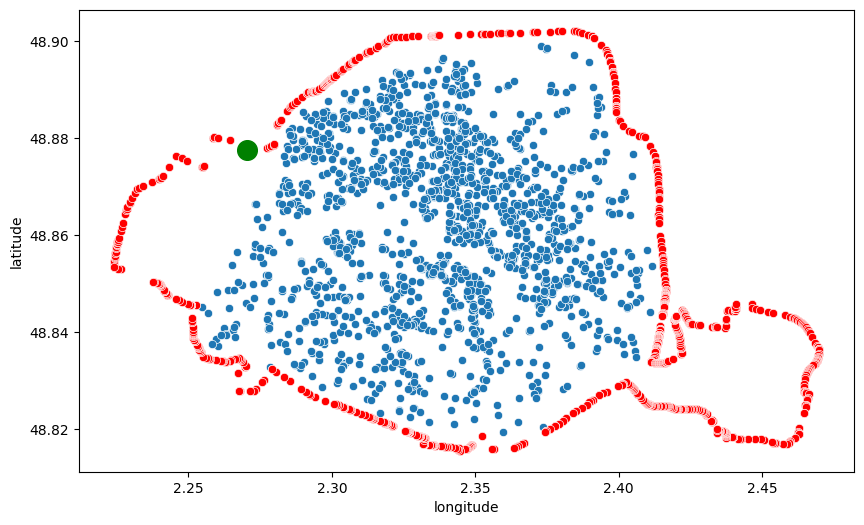

In [83]:
detect_outliers(bonus_df,df,"plot")